# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sqlalchemy import create_engine
from scipy.stats import jarque_bera
import warnings

students = pd.read_csv("../../data/EDA/StudentsPerformance.csv")
students.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [2]:
variables=["math score","reading score","writing score"]

pd.options.display.float_format = '{:.5f}'.format

distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

for variable in variables:
    jb_stats = jarque_bera(students[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
distribution_tests


,variable,jarque_bera_stats,jarque_bera_p_value
0,math score,15.91226,0.00035
1,reading score,11.38330,0.00337
2,writing score,13.98509,0.00092


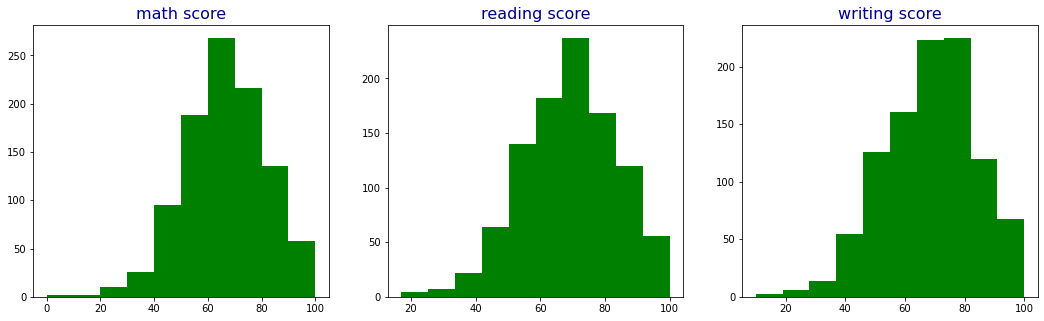

In [3]:
j=1
plt.figure(figsize=(18,5))
for var in variables: 
    plt.subplot(1,3,j)
    plt.hist(students[var],color="green")
    plt.title("{}".format(var), color="darkblue",fontsize=16)
    j=j+1

**LOG-TRANSFORMATION:**

In [4]:
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(students[variable]+0.00001))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
distribution_tests


,variable,jarque_bera_stats,jarque_bera_p_value
0,math score,15928783.83456,0.00000
1,reading score,495.12695,0.00000
2,writing score,1410.93502,0.00000


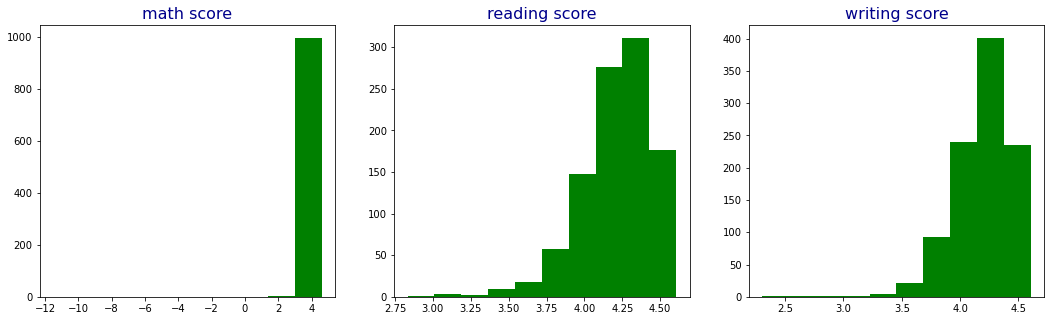

In [5]:
j=1
plt.figure(figsize=(18,5))
for var in variables: 
    plt.subplot(1,3,j)
    plt.hist(np.log(students[var]+0.00001),color="green")
    plt.title("{}".format(var), color="darkblue",fontsize=16)
    j=j+1

**SQUARE ROOT TRANSFORMATION:**

In [6]:
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.sqrt(students[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value
0,math score,1233.47997,0.00000
1,reading score,88.00833,0.00000
2,writing score,141.63782,0.00000


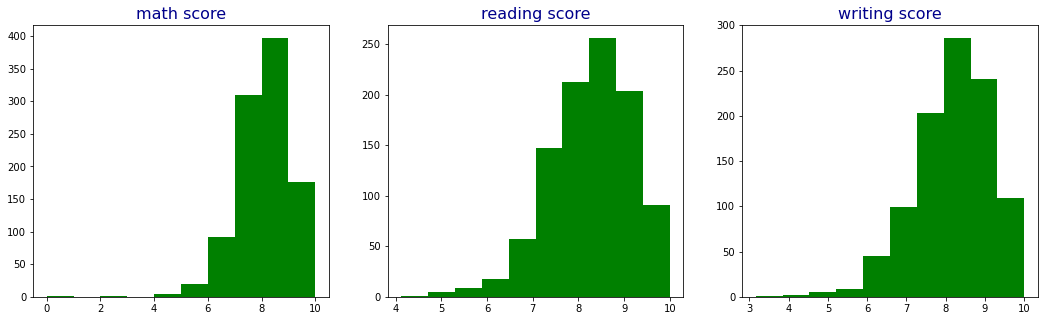

In [7]:
j=1
plt.figure(figsize=(18,5))
for var in variables: 
    plt.subplot(1,3,j)
    plt.hist(np.sqrt(students[var]),color="green")
    plt.title("{}".format(var), color="darkblue",fontsize=16)
    j=j+1

**INVERSE TRANSFORMATION:**

In [8]:
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

for variable in variables:
    jb_stats = jarque_bera(1/(students[variable]+0.00001))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value
0,math score,41417291.49930,0.00000
1,reading score,14069.00268,0.00000
2,writing score,217089.12252,0.00000


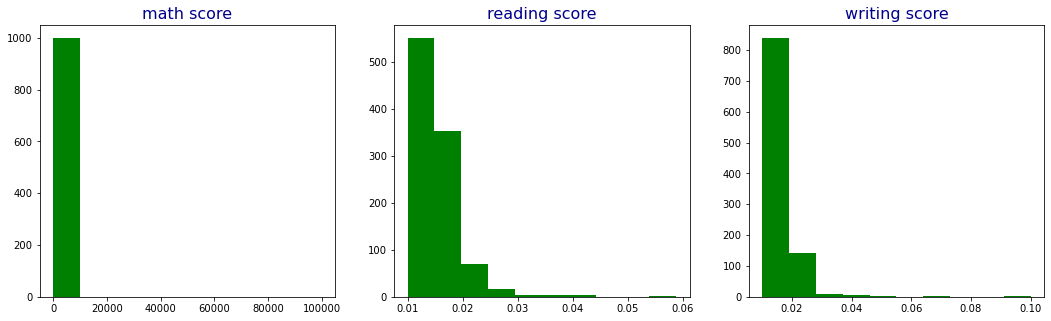

In [9]:
j=1
plt.figure(figsize=(18,5))
for var in variables: 
    plt.subplot(1,3,j)
    plt.hist((1/(students[var]+0.00001)),color="green")
    plt.title("{}".format(var), color="darkblue",fontsize=16)
    j=j+1

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [10]:
students['mean score']=students[variables].mean(axis=1)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667
1,female,group C,some college,standard,completed,69,90,88,82.33333
2,female,group B,master's degree,standard,none,90,95,93,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333
4,male,group C,some college,standard,none,76,78,75,76.33333


Jarque_beraResult(statistic=15.453387913085164, pvalue=0.00044089934264401887)

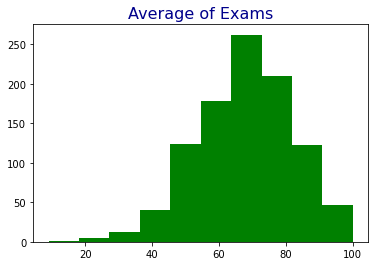

In [11]:
jb_stats = jarque_bera(students['mean score'])
display(jb_stats)

plt.hist(students['mean score'],color="green")
plt.title("Average of Exams", color="darkblue",fontsize=16);

Jarque_beraResult(statistic=2167.0393472287465, pvalue=0.0)

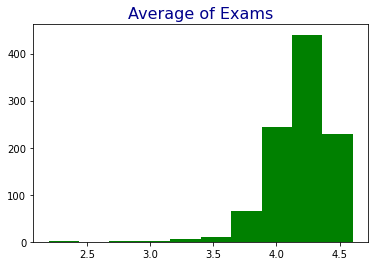

In [12]:
##Log-Transformation:
jb_stats = jarque_bera(np.log(students['mean score']))
display(jb_stats)

plt.hist(np.log(students['mean score']),color="green")
plt.title("Average of Exams", color="darkblue",fontsize=16);

Jarque_beraResult(statistic=606586.931895144, pvalue=0.0)

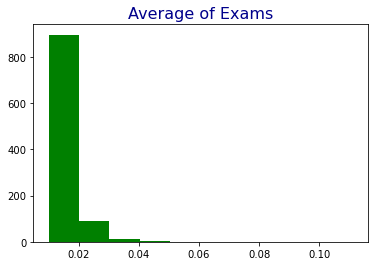

In [13]:
##Inverse Transformation:
jb_stats = jarque_bera(1/(students['mean score']))
display(jb_stats)

plt.hist(1/(students['mean score']),color="green")
plt.title("Average of Exams", color="darkblue",fontsize=16);

Jarque_beraResult(statistic=187.7135523631838, pvalue=0.0)

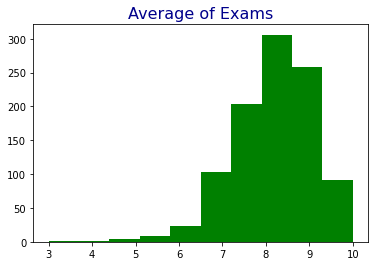

In [14]:
##Square-Root Transformation:
jb_stats = jarque_bera(np.sqrt(students['mean score']))
display(jb_stats)

plt.hist(np.sqrt(students['mean score']),color="green")
plt.title("Average of Exams", color="darkblue",fontsize=16);

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [15]:
students_cat=students.select_dtypes(include=['object'])
students_cat.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [16]:
pd.options.display.float_format = '{:.6f}'.format

for var in students_cat.columns:
    
    Y=students['mean score'] 
    X=students[var]
   
    model = ols('Y ~ X', data=students).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print('The difference between the levels of {} in terms of Average of Exam Scores.'.format(var))
    print(anova_table)
    print("****"*25)


The difference between the levels of gender in terms of Average of Exam Scores.
                sum_sq         df         F   PR(>F)
X          3477.472007   1.000000 17.388179 0.000033
Residual 199590.600882 998.000000       nan      nan
****************************************************************************************************
The difference between the levels of race/ethnicity in terms of Average of Exam Scores.
                sum_sq         df        F   PR(>F)
X          7163.645895   4.000000 9.096052 0.000000
Residual 195904.426994 995.000000      nan      nan
****************************************************************************************************
The difference between the levels of parental level of education in terms of Average of Exam Scores.
                sum_sq         df         F   PR(>F)
X         10420.367638   5.000000 10.753147 0.000000
Residual 192647.705250 994.000000       nan      nan
*******************************************************

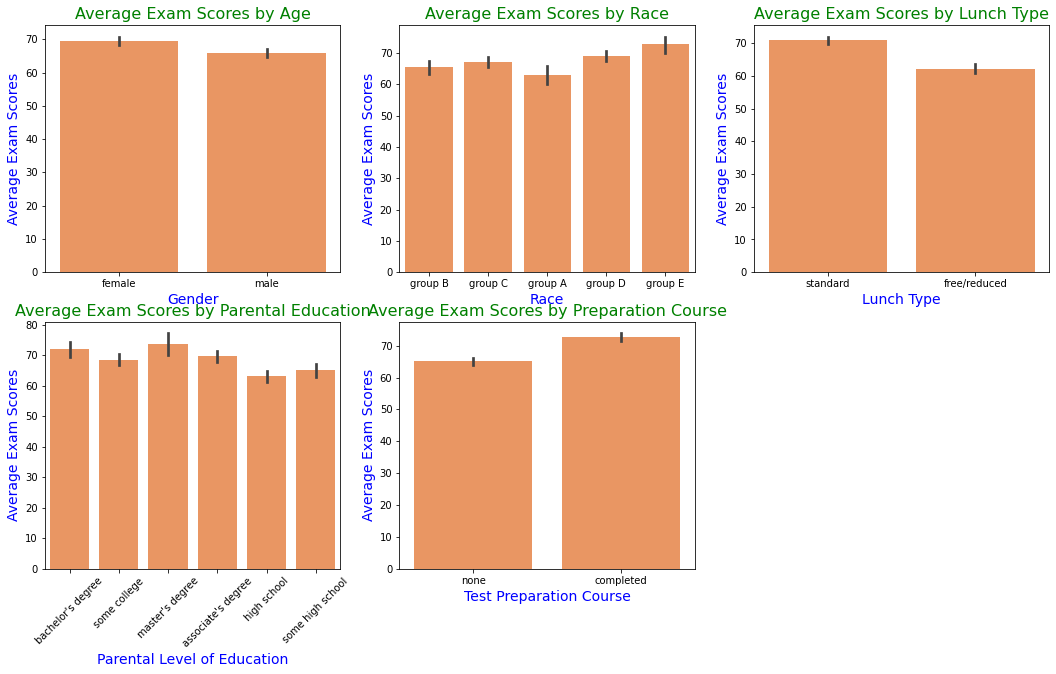

In [17]:
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
plt.title('Average Exam Scores by Age',fontsize=16, color="green")
sns.barplot(x=students["gender"], y=students["mean score"],color = "#FF914D")
plt.xlabel('Gender', fontsize=14, color="blue")
plt.ylabel('Average Exam Scores', fontsize=14, color="blue")
plt.xticks(rotation = 0, fontsize = 10)

plt.subplot(2,3,2)
plt.title('Average Exam Scores by Race',fontsize=16, color="green")
sns.barplot(x=students["race/ethnicity"], y=students["mean score"],color = "#FF914D")
plt.xlabel('Race', fontsize=14, color="blue")
plt.ylabel('Average Exam Scores', fontsize=14, color="blue")
plt.xticks(rotation = 0, fontsize = 10)

plt.subplot(2,3,3)
plt.title('Average Exam Scores by Lunch Type',fontsize=16, color="green")
sns.barplot(x=students["lunch"], y=students["mean score"],color = "#FF914D")
plt.xlabel('Lunch Type', fontsize=14, color="blue")
plt.ylabel('Average Exam Scores', fontsize=14, color="blue")
plt.xticks(rotation = 0, fontsize = 10)

plt.subplot(2,3,4)
plt.title('Average Exam Scores by Parental Education',fontsize=16, color="green")
sns.barplot(x=students["parental level of education"], y=students["mean score"],color = "#FF914D")
plt.xlabel('Parental Level of Education', fontsize=14, color="blue")
plt.ylabel('Average Exam Scores', fontsize=14, color="blue")
plt.xticks(rotation = 45, fontsize = 10)

plt.subplot(2,3,5)
plt.title('Average Exam Scores by Preparation Course',fontsize=16, color="green")
sns.barplot(x=students["test preparation course"], y=students["mean score"],color = "#FF914D")
plt.xlabel('Test Preparation Course', fontsize=14, color="blue")
plt.ylabel('Average Exam Scores', fontsize=14, color="blue")
plt.xticks(rotation = 0, fontsize = 10)

plt.show()


**Interpretation:**

Considering all these, all variables might be used in explaining the success in the exams.

**(4)** Does the test preparation course have an impact on the target variable you created?

Those who completed the test preparation course seem to be more successful than the others.